<a href="https://colab.research.google.com/github/Naimish240/OpinionClassifier/blob/main/OpinionClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Using ML and DL algorithms to identify if a statement is an Opinion.**

---
8th May 2021

Author : [Naimish Mani B](https://www.linkedin.com/in/naimish-balaji-a6182b180/)

---
[Dataset](http://www.cs.cornell.edu/people/pabo/movie-review-data/)

---
Libraries Used:
- Pandas
- Numpy
- Sci-Kit Learn
- MatPlotLib
- Shap
- Tensorflow / Keras

# **Introduction**

In the world of social media, we are being constantly bombarded with textual information left and right. Identifying whether we are reading an _objective statement_ or a _subjective opinion_ becomes difficult. But why is it important, to distinguish between the two?

To answer this, we must first understand the difference between the two.

---
- **Objective Statement** : A detail which may or may not be true, depending on objective observed proof that anyone can verify.

- **Subjective Opinion** : A biased interpretation / judgement that can neither be proved nor disproved.
---

Let us take the following example: **"_Dairy Milk Silk is the best chocolate_"** 

Although it _sounds_ like an objective statement, it is an opinion. And an opinion that can lead to arguments, if another person comes along claiming that a 5 star chocolate is better. It is not that hard to imagine how similar statements (on topics like politics) can lead to chaos both online and offline. Hence, there exists a need to clearly identify a statement as an **opinion** to predict and de esecalate potential conflicts.

--- 

The next natural question would be, how do we identify an opinion?

One method is through asking the following question:
- Does it contain words that seem to express bias?

If the answer for this question is "yes", then it is an opinion.

---
Now that we have understood how we humans can identify an opinion, we can next come to the crux of this project. 

**_"How do we get a computer to figure out if a given statement is an opinion?"_**

People have attempted to solve this problem in the past, as follows. 

- [Akshat Bakliwal et al.](https://www.aclweb.org/anthology/W11-3715.pdf) made use of a "Simple + POS-Tagged NGram with Negation Handling Feature MLP model", and achieved an accuracy of 81.60% on the Movie Reviews dataset. 
- [Mateusz Tatusko](https://github.com/espressoctopus/opinion-or-fact-sentence-classifier) used a Bag of Words (BOW) based approach with the Opiniosis dataset, and got 97% accuracy in training. But the model did not perform well on samples outside the dataset. 
- [Mahmoud Othman et al.](http://www.jcomputers.us/vol11/jcp1105-05.pdf) used Part of Speech (POS) tagging on a multi class dataset of 4000 statements, and achieved an average precision of 82.525% across all 4 classes.
- [Jorge Carrillo-de-Albornoz et al.](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0209961) have also worked on extracting facts, opinions and experiences from health forms. They used a Support Vector Machine (SVM) on a dataset of 3000 posts using 10-fold cross validation to achieve an accuracy of above 80%.

---

Through the course of this notebook, I examine the potential of various machine learning algorithms for solving this task. The algorithms I have tried include

- Logistic Regression
- Random Forest
- SVC
- Naive Bayes Classifier
- LSTM (Defined using Sub Classing) and
- 1D CNN (Defined using Sequential Method)

To vectorize the inputs, I have made use of TF-IDF for the ML models and Embedding Layers for the DL models.

Apart from this, I have also made use of Shapley Additive explanations (SHAP) to interpret the results of the various models.

Following the results of this notebook, I have also made a [website]() hosting the model. Users can give a statement as input, and the model will return its prediction for the sentence, along with an image explaining why it made its decision, through Shapley analysis.

---

## Download Dataset

In [ ]:
# Download the Dataset from GitHub (found on https://github.com/fractalego 's profile)

!wget 'https://raw.githubusercontent.com/fractalego/subjectivity_classifier/master/data/subj_dataset/objective_cv_train.txt'
!wget 'https://raw.githubusercontent.com/fractalego/subjectivity_classifier/master/data/subj_dataset/objective_test.txt'
!wget 'https://raw.githubusercontent.com/fractalego/subjectivity_classifier/master/data/subj_dataset/subjective_cv_train.txt'
!wget 'https://raw.githubusercontent.com/fractalego/subjectivity_classifier/master/data/subj_dataset/subjective_test.txt'

--2021-05-08 15:33:13--  https://raw.githubusercontent.com/fractalego/subjectivity_classifier/master/data/subj_dataset/objective_cv_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 596357 (582K) [text/plain]
Saving to: ‘objective_cv_train.txt’

objective_cv_train. 100%[===================>] 582.38K  --.-KB/s    in 0.08s   

2021-05-08 15:33:13 (7.21 MB/s) - ‘objective_cv_train.txt’ saved [596357/596357]

--2021-05-08 15:33:13--  https://raw.githubusercontent.com/fractalego/subjectivity_classifier/master/data/subj_dataset/objective_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443...

In [ ]:
!ls

objective_cv_train.txt	sample_data		 subjective_test.txt
objective_test.txt	subjective_cv_train.txt


# **Pre Processing**

## Load Dataset into Memory

Here, we use the following label encoding:

- A sentence from the text files labelled as "subjective" is given the value '1' (Since its an opinion)

- A sentence from the text files labelled as "objective" is given the value '0' (Since its not an opinion)



In [ ]:
import glob

# Load all four text files into a DataFrame
text = []
labels = []

# Iterate through text
for i in glob.glob('./*.txt'):
  # Opens each file
  with open(i, 'r') as fh:
    for line in fh.readlines():
      text.append(line)
      # Applies appropriate labels
      if 'objective' in i:
        labels.append(0)
      else:
        labels.append(1)

print(len(text))
print(len(labels))

9999
9999


## Create DataFrame

In [ ]:
import pandas as pd

df = pd.DataFrame()
df['text'] = text
df['labels'] = labels
df.head()

,text,labels
0,the movie begins in the past where a young boy...,0
1,emerging from the human psyche and showing cha...,0
2,spurning her mother's insistence that she get ...,0
3,amitabh can't believe the board of directors a...,0
4,"she , among others excentricities , talks to a...",0


In [ ]:
print("Shape: ", df.shape)
df.labels.value_counts()

Shape:  (9999, 2)


0    5000
1    4999
Name: labels, dtype: int64

#**ML Models**

## Perform TF-IDF to get vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
vectors = vectorizer.fit_transform(df.text)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

,able,about,acting,action,actors,actually,after,again,against,age,all,almost,along,also,although,always,america,american,an,and,another,any,anyone,anything,are,around,art,as,at,audience,away,back,bad,based,be,beautiful,because,become,becomes,been,...,want,wants,war,was,watch,watching,way,we,well,were,what,when,where,which,while,white,who,whole,whose,why,wife,will,with,without,woman,women,work,working,works,world,worth,would,writer,year,years,yet,york,you,young,your
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.300563,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.284917,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175833,0.0,0.0,0.0,0.0,0.18957,0.0,0.311496,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.247223,0.0,0.180026,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084071,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.153831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.279225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218792,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.200172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.278991,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.181670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.327291,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


## Split into Train and Test sets

In [ ]:
from sklearn.model_selection import train_test_split

x = words_df
y = df.labels

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=42
)

## Import statements

In [ ]:
# Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# Import Metrics
from sklearn.metrics import precision_recall_curve, auc, roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Import graph stuff
import matplotlib.pyplot as plt
import seaborn as sn

# Function to evaluate the model
def clfEvaluate(clf, X, y):

  # Confusion matrix
  # Get Predictions
  y_pred = clf.predict(X)
  confMat = confusion_matrix(y, y_pred)

  # Calculate Values
  pr = precision_score(y, y_pred)
  rc = recall_score(y, y_pred)
  acc = accuracy_score(y, y_pred)

  # Print them
  print("Confusion Matrix:\n", confMat)
  print("Precision: ", pr)
  print("Recall: ", rc)
  print("Accuracy: ", acc)

  # Plot the matrix
  sn.heatmap(confMat, cmap="Blues", annot=True)
  plt.show()

  print("-------------------------------------------------------------")

  # ROC - AUC
  # Get the probabilities
  y_predict_proba = clf.predict_proba(X)[:, 1]

  # Calculate the values
  precision, recall, thresholds = precision_recall_curve(y, y_predict_proba)
  fpr, tpr, thresholds = roc_curve(y, y_predict_proba)

  # Plot the curve
  plot_roc_curve(clf, X, y)
  plt.show()

  # Print values of area under the ROC and PR curves
  print('ROC AUC', auc(fpr, tpr), '\n', 'PR AUC', auc(recall, precision))

## Logistic Regression

Confusion Matrix:
 [[408  75]
 [ 67 450]]
Precision:  0.8571428571428571
Recall:  0.8704061895551257
Accuracy:  0.858


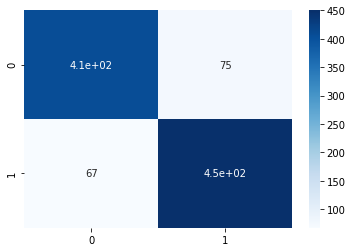

-------------------------------------------------------------


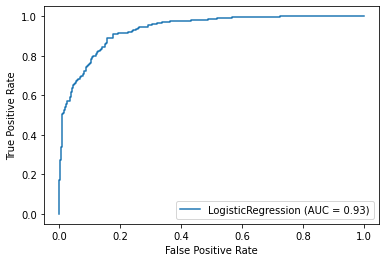

ROC AUC 0.9338074814485544 
 PR AUC 0.9362857808037244
CPU times: user 5.57 s, sys: 1.04 s, total: 6.62 s
Wall time: 3.57 s


In [ ]:
%%time
# Create and train a logistic regression classifier
lr = LogisticRegression(C=1e9, solver='lbfgs', max_iter=1000)
lr.fit(x_train, y_train)
clfEvaluate(lr, x_test, y_test)

## Inference
From this, we can see that this model has a good accuracy of 85.8%, and an AUC of 0.93.

## Random Forest

Confusion Matrix:
 [[417  66]
 [ 82 435]]
Precision:  0.8682634730538922
Recall:  0.8413926499032882
Accuracy:  0.852


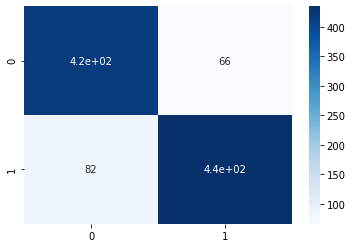

-------------------------------------------------------------


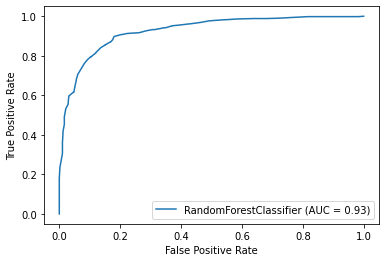

ROC AUC 0.9253456996287709 
 PR AUC 0.931225598631077
CPU times: user 3.16 s, sys: 128 ms, total: 3.29 s
Wall time: 3.18 s


In [ ]:
%%time
# Create and train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)
clfEvaluate(rf, x_test, y_test)

## Inference
From this, we can see that this model has a good accuracy of 84.7%, and an AUC of 0.93.

## SVC

Confusion Matrix:
 [[414  69]
 [ 69 448]]
Precision:  0.8665377176015474
Recall:  0.8665377176015474
Accuracy:  0.862


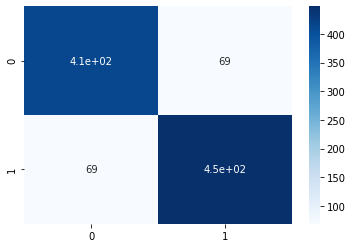

-------------------------------------------------------------


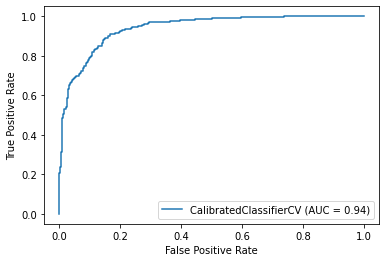

ROC AUC 0.9398104208464986 
 PR AUC 0.941819390817888
CPU times: user 924 ms, sys: 558 ms, total: 1.48 s
Wall time: 886 ms


In [ ]:
%%time
from sklearn.calibration import CalibratedClassifierCV

# Create and train a SVC classifier
svc = LinearSVC()

# Calibrate classifier, since SVC doesn't have 'predict_proba' function
# which is used in the evaluation method
svc = CalibratedClassifierCV(svc) 
svc.fit(x_train, y_train)

clfEvaluate(svc, x_test, y_test)

## Inference
From this, we can see that this model has a good accuracy of 86.2%, and an AUC of 0.94.

## Naive Bayes

Confusion Matrix:
 [[414  69]
 [ 65 452]]
Precision:  0.8675623800383877
Recall:  0.874274661508704
Accuracy:  0.866


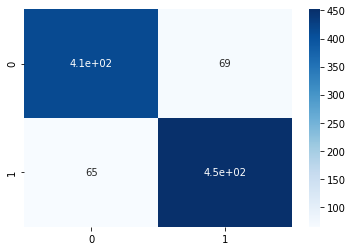

-------------------------------------------------------------


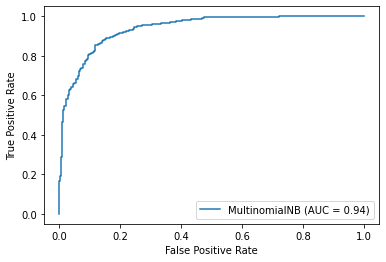

ROC AUC 0.9391736847796053 
 PR AUC 0.9397793661301341
CPU times: user 500 ms, sys: 277 ms, total: 777 ms
Wall time: 479 ms


In [ ]:
%%time
# Create and train a multinomial naive bayes classifier (MultinomialNB)
bayes = MultinomialNB()
bayes.fit(x_train, y_train)
clfEvaluate(bayes, x_test, y_test)

## Inference
From this, we can see that this model has a good accuracy of 86.6%, and an AUC of 0.94.

# **DL Model**


## Pre Processing

In [ ]:
from tensorflow import keras as keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
# Initialise x, y for deep learning models
x_dl, y_dl = df.text, df.labels

# Split into train and test sets
x_train_dl, x_test_dl, y_train_dl, y_test_dl = train_test_split(
    x_dl, y_dl, test_size=0.1, random_state=42
)

In [ ]:
# Tokenizing (with padding)
max_words = 500
max_len = 150
tok = Tokenizer(num_words=max_words, lower=True)
tok.fit_on_texts(x_train_dl.ravel())
sequences = tok.texts_to_sequences(x_train_dl)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

## LSTM

In [ ]:
# Define LSTM Model
# Through Sub Classing method

inputs = Input(name='inputs',shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(64)(layer)
layer = Dense(256,name='FC1')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1,name='out_layer')(layer)
layer = Activation('sigmoid')(layer)

lstm_model = Model(inputs=inputs,outputs=layer)

# Print model summary
lstm_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           25000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [ ]:
# Compile Model
lstm_model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train Model
lstm_history = lstm_model.fit(sequences_matrix,
          y_train_dl,
          batch_size=128,
          epochs=10,
          validation_split=0.2,
          callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
57/57 [==============================] - 13s 196ms/step - loss: 0.6036 - accuracy: 0.6733 - val_loss: 0.4000 - val_accuracy: 0.8194
Epoch 2/10
57/57 [==============================] - 11s 189ms/step - loss: 0.3165 - accuracy: 0.8672 - val_loss: 0.3200 - val_accuracy: 0.8567
Epoch 3/10
57/57 [==============================] - 11s 197ms/step - loss: 0.2851 - accuracy: 0.8849 - val_loss: 0.3184 - val_accuracy: 0.8594
Epoch 4/10
57/57 [==============================] - 11s 198ms/step - loss: 0.2645 - accuracy: 0.8911 - val_loss: 0.3253 - val_accuracy: 0.8628


In [ ]:
# Test the Model

# Create test sequence
test_sequences = tok.texts_to_sequences(x_test_dl)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

# Calculate accuracy
accr = lstm_model.evaluate(test_sequences_matrix,y_test_dl)

# Print it
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

32/32 [==============================] - 1s 22ms/step - loss: 0.3211 - accuracy: 0.8660
Test set
  Loss: 0.321
  Accuracy: 0.866


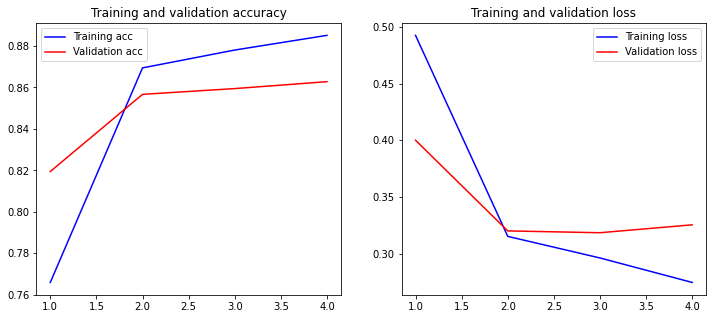

In [ ]:
# Plot Model History
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(lstm_history)

## Inference
From this, we can see that this model has a good accuracy of 86.6%.

## 1D CNN

In [ ]:
from keras.layers import Conv1D, Flatten, MaxPooling1D, Embedding, Dropout
from keras.models import Sequential

In [ ]:
import keras.backend as K
# Clear session since we had just trained another model
K.clear_session()

In [ ]:
# Define Model
# Through Sequential method
cnn_model = Sequential()
cnn_model.add(Input(shape=[max_len]))
cnn_model.add(Embedding(max_words, 50, input_length=max_len))
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv1D(15, 3, padding='valid', activation='relu'))
cnn_model.add(MaxPooling1D())
cnn_model.add(Conv1D(15, 3, padding='valid', activation='relu'))
cnn_model.add(MaxPooling1D())
cnn_model.add(MaxPooling1D())
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 50)           25000     
_________________________________________________________________
dropout (Dropout)            (None, 150, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 148, 15)           2265      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 74, 15)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 72, 15)            690       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 36, 15)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 18, 15)           

In [ ]:
# Compile Model
cnn_model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train Model
cnn_history = cnn_model.fit(sequences_matrix,
          y_train_dl,
          batch_size=128,
          epochs=10,
          validation_split=0.2,
          callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
57/57 [==============================] - 4s 55ms/step - loss: 0.6892 - accuracy: 0.5257 - val_loss: 0.6045 - val_accuracy: 0.6900
Epoch 2/10
57/57 [==============================] - 3s 51ms/step - loss: 0.5292 - accuracy: 0.7621 - val_loss: 0.4315 - val_accuracy: 0.8156
Epoch 3/10
57/57 [==============================] - 3s 52ms/step - loss: 0.4153 - accuracy: 0.8150 - val_loss: 0.3900 - val_accuracy: 0.8406
Epoch 4/10
57/57 [==============================] - 3s 52ms/step - loss: 0.3411 - accuracy: 0.8583 - val_loss: 0.3430 - val_accuracy: 0.8600
Epoch 5/10
57/57 [==============================] - 3s 51ms/step - loss: 0.3131 - accuracy: 0.8717 - val_loss: 0.3240 - val_accuracy: 0.8628
Epoch 6/10
57/57 [==============================] - 3s 50ms/step - loss: 0.2975 - accuracy: 0.8723 - val_loss: 0.3221 - val_accuracy: 0.8628
Epoch 7/10
57/57 [==============================] - 3s 51ms/step - loss: 0.2747 - accuracy: 0.8904 - val_loss: 0.3234 - val_accuracy: 0.8578


In [ ]:
# Create test sequence
test_sequences = tok.texts_to_sequences(x_test_dl)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

# Calculate accuracy
accr = cnn_model.evaluate(test_sequences_matrix,y_test_dl)

# Print it
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

32/32 [==============================] - 0s 5ms/step - loss: 0.3244 - accuracy: 0.8560
Test set
  Loss: 0.324
  Accuracy: 0.856


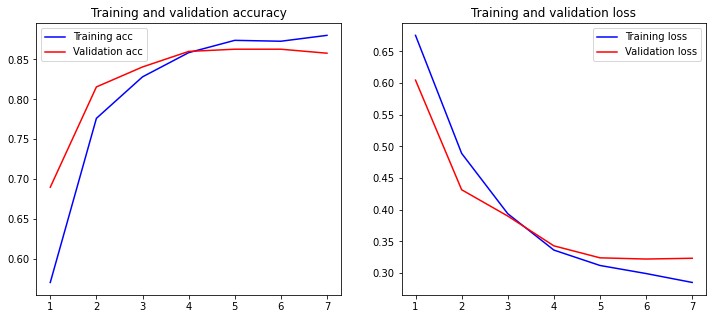

In [ ]:
plot_history(cnn_history)

## Inference
From this, we can see that the model has a good accuracy of 85.6%.

# **Interpreting ML Models using Shap**

## Installing Shap

In [ ]:
!pip3 install shap

In [ ]:
import shap
shap.initjs()

## Logistic Regression

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


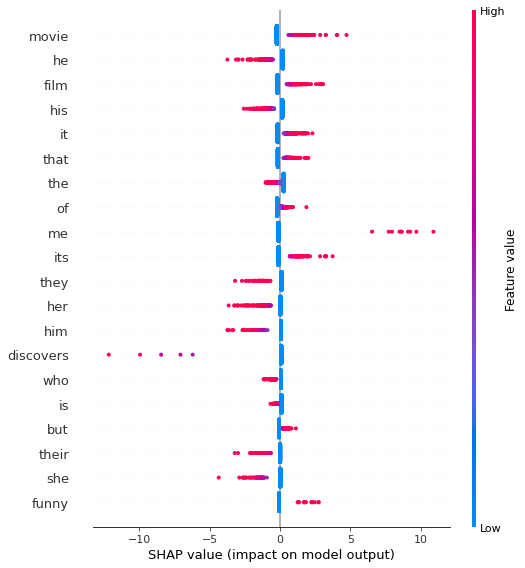

In [ ]:
explainer = shap.LinearExplainer(lr, x_train, feature_dependence="independent")
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, feature_names=vectorizer.get_feature_names())

In [ ]:
shap.initjs()
print(y_train.iloc[[0]])
shap.force_plot(explainer.expected_value, shap_values[0], x_train.iloc[[0]])

8157    1
Name: labels, dtype: int64


## Inference
From the first graph, we can see that the model has learnt that words like "movie", "me" and "funny" tend to imply that the phrase is likely to be a subjective statement. These are words that are usually used in the context of one's opinion, and hence the model has accurately learnt this.

Also, we can see that the model associates words like "discover", "he", "she", etcetera with a sentence being objective. These words too, are usually used in the context of objective statements (eg. he is good friends with her).

Next, from the second graph, we can see that words like "might", "still" and "filmmaker" lead the model towards selecting "subjectivity".

## Random Forest

feature_dependence = "independent" has been renamed to feature_perturbation = "interventional"! See GitHub issue #882.
 98%|===================| 1967/2000 [00:55<00:00]       

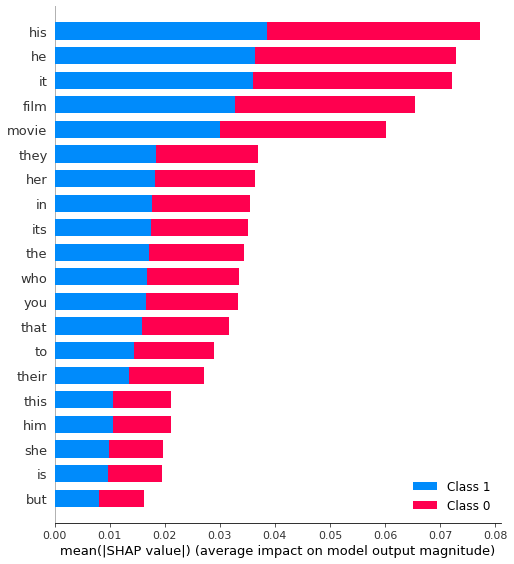

In [ ]:
explainer = shap.TreeExplainer(rf, x_train, feature_dependence="independent")
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, feature_names=vectorizer.get_feature_names())

## Inference

From this, we can infer that the words "his", "he", "it", "film" and "movie" have the most impact on the model's output.

## SVC

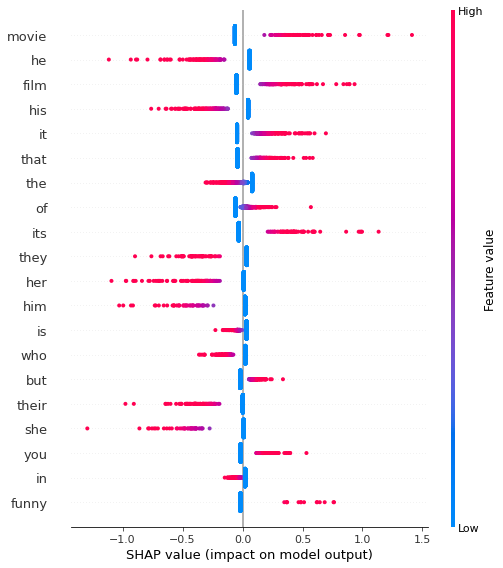

In [ ]:
# Since we used calibrated classifier, a lot of debugging was required to get it to work
# https://stackoverflow.com/questions/66560839/what-do-maskers-really-do-in-shap-package-and-fit-them-to-train-or-test
# https://github.com/slundberg/shap/issues/899#issuecomment-726411688

import numpy as np

masker = shap.maskers.Independent(data = x_train)

shap_values_list = []
for calibrated_classifier in svc.calibrated_classifiers_:
    explainer = shap.LinearExplainer(calibrated_classifier.base_estimator, masker=masker)
    shap_values = explainer.shap_values(x_test)
    shap_values_list.append(shap_values)

shap_values = np.array(shap_values_list).sum(axis=0) / len(shap_values_list)

shap.summary_plot(shap_values, x_test, feature_names=vectorizer.get_feature_names())

In [ ]:
shap.initjs()
print(y_train.iloc[[0]])
shap.force_plot(explainer.expected_value, shap_values[0], x_train.iloc[[0]])

8157    1
Name: labels, dtype: int64


## Inference
From the first graph, we can see that the words "movie", "film", "you" and "funny" influence the model towards subjectivity, whereas words like "his", "he", "they" imply objectivity.

From the second graph, we can also see that the words "point", "might" and "filmmaker" lead the model towards subjectivity, but at the same time words like "turn" and "his" confuse the model. In this example, the model _barely_ assumes the sentence is subjective.

## Naive Bayes

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


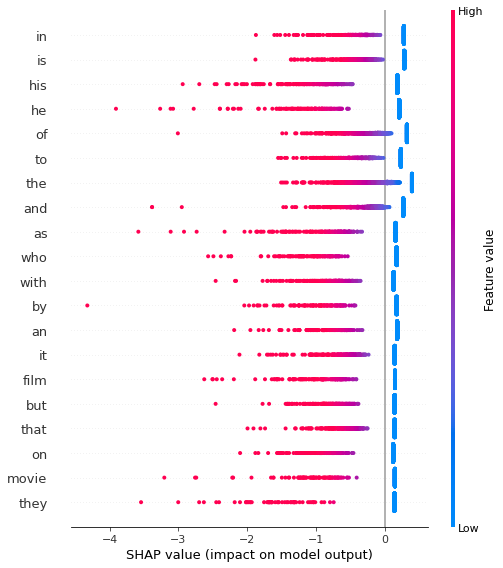

In [ ]:
explainer = shap.LinearExplainer(bayes, x_train, feature_dependence="independent")
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, feature_names=vectorizer.get_feature_names())

In [ ]:
shap.initjs()
print(y_train.iloc[[0]])
shap.force_plot(explainer.expected_value, shap_values[0], x_train.iloc[[0]])

8157    1
Name: labels, dtype: int64


## Inference
From the first graph, we can see that the words "he", "by" and "they" have the highest impact on the model's performance. 

In the second graph, this model has predicted this statement's label incorrectly.

## Note 
Shap was initially written for TF 1.x, and the DeepExplainer package is yet to be fully ported over to TF 2.x. As all the models have been implemented in TF 2.4.1 (see below), the visualisation for the 1D CNN and the LSTM have not been implemented in this notebook.

https://github.com/slundberg/shap/issues/1055

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# **Conclusion**

From the above tests, it is evident that the best performing models are the Naive Bayes classifier and LSTM, with equal accuracies of 86.6%.

But Logistic Regression and Support Vector Classifier also come in close, with accuracies of 85.8% and 86.2% respectively.

**Since the Logistic Regression classifier is both easier to train and not too computationally heavy, we shall be using it for our website.**

# **Future Work**
Some options for future work are as follows:

- This model is trained on a relatively small dataset (only 10k samples). Training the model on more data might help boost the accuracy.

- We used very simple architectures for both deep learning models. Making the networks deeper might help the model identify finer details, further improving its accuracy.

- The dictionary size for TF-IDF was limited to 500, and the neural networks at 1000. Increasing the vocabulary size, or using optimised models like Word2Vec might help improve performance.

- The input text is limited to only under 150 characters. Most sentences and paragraphs are much longer than that. Hence, using deep learning models like Transformers might offer better results.